## Weather Processing

### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date, datetime, timedelta

### Import the dataset. Assign it to a variable called data

In [2]:
path = r'./data/weather_dataset.data.csv'
data = pd.read_csv(path, sep='\s+')

### Write a function in order to fix date (this relate only to the year info) and apply it


In [3]:
#Let's first look at the dataset and check the types of columns.

data.head(5)

,Yr,Mo,Dy,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [4]:
data.dtypes

Yr        int64
Mo        int64
Dy        int64
loc1     object
loc2     object
loc3     object
loc4     object
loc5     object
loc6     object
loc7     object
loc8     object
loc9     object
loc10    object
loc11    object
loc12    object
dtype: object

In [5]:
#Now let's check if columns Yr, Mo, Dy contain values appropriate for dates.
#As we can notice, days are in a range from 1 to 31, which is typical of dates.
#Months are in a range from 1 to 12, which is typical of dates.
#And years are in a range from 61 to 78, which is completely fine.

data.describe()

,Yr,Mo,Dy
count,6574.000000,6574.000000,6574.000000
mean,69.500304,6.523274,15.728628
std,5.188131,3.448871,8.800335
min,61.000000,1.000000,1.000000
25%,65.000000,4.000000,8.000000
50%,69.500000,7.000000,16.000000
75%,74.000000,10.000000,23.000000
max,78.000000,12.000000,31.000000


In [6]:
#Let's fix year info.

data['Yr'] = data['Yr'].apply(lambda x: x+1900)
data['Yr']

0       1961
1       1961
2       1961
3       1961
4       1961
        ... 
6569    1978
6570    1978
6571    1978
6572    1978
6573    1978
Name: Yr, Length: 6574, dtype: int64

In [7]:
#And check if everything is all right with the Yr column.
#The range is between 1961 and 1978 as was expected.

data['Yr'].describe()

count    6574.000000
mean     1969.500304
std         5.188131
min      1961.000000
25%      1965.000000
50%      1969.500000
75%      1974.000000
max      1978.000000
Name: Yr, dtype: float64

### Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]

In [8]:
data['Date'] = data['Yr'].astype(str) + '-' + data['Mo'].astype(str) + '-' + data['Dy'].astype(str)
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
datetime_index = pd.DatetimeIndex(data['Date'].values)
data = data.set_index(datetime_index)

In [9]:
#Let's drop unnecessary columns.

data.drop(['Yr','Mo','Dy','Date'], axis=1,inplace=True)
data[:5]

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Check if everything is okay with the data. Create functions to delete/fix rows with strange cases and apply them

In [10]:
#Let's replace all values which contain any characters except for digits with nans.

data.replace('[^0-9.]', np.nan, regex=True, inplace=True)
data[:5]

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [11]:
#Now we can change the data type of the whole dataset for convenience.

data = data.astype('float')

In [12]:
data.dtypes

loc1     float64
loc2     float64
loc3     float64
loc4     float64
loc5     float64
loc6     float64
loc7     float64
loc8     float64
loc9     float64
loc10    float64
loc11    float64
loc12    float64
dtype: object

### Compute how many values are missing for each location over the entire record

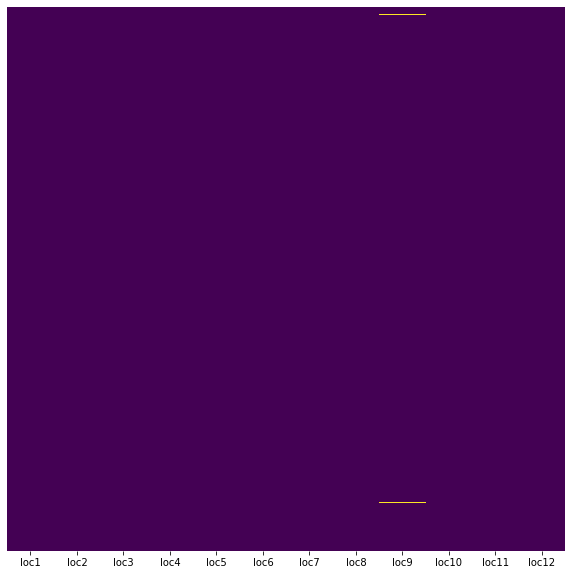

In [13]:
#Fist, we can create a heatmap for a visual representation of the missing values.
#However, we barely see them on it. It means that there are a few missing values.

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [14]:
#Let's count missing values more precisely.

missing_values = data.isna().sum()
missing_values

loc1     7
loc2     5
loc3     5
loc4     8
loc5     5
loc6     1
loc7     6
loc8     4
loc9     6
loc10    2
loc11    1
loc12    5
dtype: int64

#### Compute how many non-missing values there are in total

In [15]:
#DataFrame.count is used to count non-NA cells for each column or row.

data.count().sum()

78833

In [16]:
#Let's fill in missing values with the help of the Next Observation Carried Backward technique.

data = data.bfill()

In [17]:
#Now let's check if missing values have been filled in.

data.isna().sum() 

loc1     0
loc2     0
loc3     0
loc4     0
loc5     0
loc6     0
loc7     0
loc8     0
loc9     0
loc10    0
loc11    0
loc12    0
dtype: int64

### Calculate the mean windspeeds of the windspeeds over all the locations and all the times

In [18]:
#Descriptive statistics show a strange behavior in column loc9.
#The mean value differs a lot from other columns.

data.describe()

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
count,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6.574000e+03,6574.000000,6574.000000,6574.000000
mean,12.361751,10.643906,11.659890,6.308029,10.455741,7.092387,9.797271,8.493826,1.521144e+12,8.707744,13.120138,15.596223
std,5.616596,5.267553,5.007439,3.605126,4.935934,3.968734,4.977461,4.501265,1.233347e+14,4.503747,5.833662,6.698234
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000e+00,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000e+00,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000e+00,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,1.121000e+01,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,1.000000e+16,28.210000,42.380000,42.540000


In [19]:
#Let's look for outliers.
#For this purpose, we take the max value of windspeed from another column.

data.query("loc9 > 42.54")

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
1976-05-31,9.96,11.42,10.41,3.29,9.75,5.09,6.29,6.75,1.000000e+16,5.88,11.5,9.42


In [20]:
#Let's drop a row with the outlier.

data = data.drop("1976-05-31")

In [21]:
#Now data looks normal.

data.describe()

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
count,6573.000000,6573.000000,6573.000000,6573.000000,6573.000000,6573.000000,6573.000000,6573.000000,6573.000000,6573.000000,6573.000000,6573.000000
mean,12.362116,10.643788,11.660081,6.308488,10.455848,7.092691,9.797805,8.494091,8.494115,8.708174,13.120385,15.597163
std,5.616945,5.267945,5.007796,3.605208,4.936302,3.968959,4.977652,4.501556,4.166547,4.503954,5.834072,6.698310
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.210000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [22]:
#Let's calculate the mean windspeeds.

data.stack().mean()

10.22789543080279

### Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days


In [23]:
loc_stats = data.agg(["min", "max", "mean", "std"], axis=0)
loc_stats

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362116,10.643788,11.660081,6.308488,10.455848,7.092691,9.797805,8.494091,8.494115,8.708174,13.120385,15.597163
std,5.616945,5.267945,5.007796,3.605208,4.936302,3.968959,4.977652,4.501556,4.166547,4.503954,5.834072,6.698310


### Find the average windspeed in January for each location

In [24]:
january_data = data[data.index.month == 1]
january_data.mean()

loc1     14.842599
loc2     12.921667
loc3     13.299624
loc4      7.199498
loc5     11.655108
loc6      8.054839
loc7     11.819355
loc8      9.498208
loc9      9.543208
loc10    10.053566
loc11    14.550520
loc12    18.028763
dtype: float64

### Downsample the record to a yearly frequency for each location

In [25]:
yearly_frequency = data.resample('Y').mean()
yearly_frequency[:5]

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
1961-12-31,12.286356,10.359973,11.356411,6.972712,10.874301,7.729726,9.722630,8.836959,8.678493,9.835808,13.502795,13.665699
1962-12-31,12.231534,10.110438,11.732712,6.958603,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.316219
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644


### Downsample the record to a monthly frequency for each location

In [26]:
data_monthly = data.resample('M').mean()
data_monthly[:5]

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
1961-01-31,14.756452,12.146129,13.431613,7.736774,10.883871,8.588065,11.184839,9.004839,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.269643,9.198571,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.900323,11.296452,10.752903,7.436129,10.598065,8.866774,9.644194,9.829677,10.334194,11.251935,16.410968,15.657742
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.702903,10.818065,5.889355,9.490323,6.574839,7.526774,8.177097,8.039355,8.499355,11.900323,12.011613


### Downsample the record to a weekly frequency for each location

In [27]:
weekly_frequency = data.resample('W').mean()
weekly_frequency[:5]

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10,loc11,loc12
1961-01-01,15.040000,14.960000,13.170000,9.290000,12.620000,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,12.257143,10.487143,6.417143,9.474286,6.435714,11.061429,5.927143,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.210000,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,18.784286,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000


### Calculate the min, max and mean windspeeds and standard deviations of the windspeeds  across all locations for each week (assume that the first week starts on January 2 1961) for the first 21 weeks

In [28]:
#Let's find out which day of the week is our starting date.
#It's Monday.

starting_date = datetime.strptime("1961-01-02", '%Y-%m-%d').date()
starting_date.weekday()

0

In [29]:
#Let's find the end of the 21-week period.

ending_date = starting_date + timedelta(weeks=21)
ending_date

datetime.date(1961, 5, 29)

In [30]:
weeks = data[starting_date:ending_date]

loc_stats_21week = weeks.resample('W-MON').agg(["min", "max", "mean", "std"], axis = 0)
loc_stats_21week[:5]

loc1                               loc2                    \
              min    max       mean       std    min    max       mean   
1961-01-02  14.71  14.71  14.710000       NaN  16.88  16.88  16.880000   
1961-01-09  10.58  18.50  13.237143  2.596592   6.63  16.88  11.392857   
1961-01-16   9.04  19.75  13.017143  3.858751   3.54  12.08   9.027143   
1961-01-23   4.92  19.83  13.221429  5.349631   3.42  14.37   9.678571   
1961-01-30  12.21  25.04  18.165714  5.665824  11.17  23.91  16.350000   

                       loc3         ...      loc10            loc11         \
                 std    min    max  ...       mean       std    min    max   
1961-01-02       NaN  10.83  10.83  ...   9.670000       NaN  17.54  17.54   
1961-01-09  3.613939   7.62  12.33  ...   8.412857  1.651027   5.46  16.62   
1961-01-16  3.194035   7.08  19.50  ...   7.321429  4.029758   5.25  20.71   
1961-01-23  3.790758   7.29  20.79  ...   8.958571  5.119787   6.50  15.92   
1961-01-30  4.901779  10.92  25.84  ...  15.467143  3.872272  14.04  27.71   

                                 loc12                              
                 mean       std    min    max       mean       std  
1961-01-02  17.540000       NaN  13.83  13.83  13.830000       NaN  
1961-01-09  11.838571  3.770943  10.88  16.46  13.458571  1.945803  
1961-01-16  11.125714  5.552215   5.17  16.92  10.120000  4.309625  
1961-01-23  10.071429  3.932825   6.79  20.58  13.082857  5.269601  
1961-01-30  21.514286  4.601144  17.50  27.63  22.340000  4.016300  

[5 rows x 48 columns]